# 소재 분류 모델 평가

Step 1.
- 정답셋 로딩
- 정규표현식 패턴으로 변환

In [129]:
import os
import pandas as pd

os.chdir(r"C:\1. Data")
os.listdir()

['23종류 분류 데이터',
 'COLOR_0723.csv',
 'SIZE_0723.csv',
 '~$소재 정답셋ver1.3(실크,새틴 수정).xlsx',
 '소재 정답셋ver1.3(실크,새틴 수정).csv',
 '소재 정답셋ver1.3(실크,새틴 수정).txt',
 '소재 정답셋ver1.3(실크,새틴 수정).xlsx',
 '소재_0723.csv']

In [130]:
data = pd.read_csv('소재 정답셋ver1.3(실크,새틴 수정).txt', engine = 'python', encoding = 'utf-16',delimiter="\t")
data.drop(["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3"], axis='columns')

,정답셋,포함단어,횟수설명
0,레이온,레이온,"레이온 18201번, 비스코스 2676번"
1,레이온,비스코스,NaN
2,나일론,나일론,NaN
3,폴리에스터,폴리에스터,"폴리에스터 109637번, 폴리에스테르 6440번, 폴리 2572번"
4,폴리에스터,폴리에스테르,NaN
5,폴리에스터,폴리,NaN
6,폴리우레탄,폴리우레탄,NaN
7,면,면,"면69925번, 코튼 5062번"
8,면,코튼,NaN
9,모,모,NaN


In [167]:
answerSet = set(data['포함단어'])

manuallyAdded = ['']
answerSet
temp = ["({})|".format(answer) for answer in answerSet]
temp = ''.join(temp)[:-1] # 마지막에 파이프 하나 빼려공
print(temp)

temp = "[" + temp + "]"
answerPattern = re.compile(temp)
answerPattern

(캐시미어)|(천연모피)|(천연모피(너구리))|(인조퍼)|(골덴)|(천연가죽(염소))|(시어서커)|(돼지가죽)|(기타섬유)|(나일론)|(벨루어)|(샴브레이)|(청)|(앙고라)|(금속성섬유(지정외))|(셀룰로오스 섬유(지정외))|(천연고무)|(플리스)|(페이크퍼)|(네오프렌)|(깃털)|(방모)|(옥스포드)|(스판)|(솜털)|(마)|(비스코스)|(리넨)|(트위드)|(에코퍼)|(벨로아)|(아크릴)|(면)|(아세테이트)|(울)|(모직)|(폴리메틸메타크릴레이트)|(샤무즈)|(데님)|(큐프라)|(견)|(홈스펀)|(저지)|(코팅가죽)|(아마)|(폴리에스터)|(천연모피(양))|(트리아세테이트)|(후리스)|(낙타)|(새틴)|(천연모피(밍크))|(천연모피(염소))|(천연모피(족제비))|(플란넬)|(야크(지정외))|(테리)|(샤무드)|(폴리염화비닐)|(천연가죽(소))|(모헤어)|(벨벳)|(폴리)|(합성고무)|(린넨)|(폴리우레탄)|(카멜)|(쭈리)|(소가죽)|(금속섬유)|(모)|(모혼방)|(모달)|(머스크랫)|(실크)|(합성가죽)|(천연가죽(사슴))|(융)|(리오셀)|(코튼)|(울혼방)|(너구리(지정외))|(스판덱스)|(코듀로이)|(토끼(지정외))|(진)|(기모)|(천연모피(소))|(폴리에스테르)|(스웨이드)|(천연모피(토끼))|(양털)|(레이온)|(천연가죽(양))|(알파카)|(천연모피(여우))


re.compile(r'[(캐시미어)|(천연모피)|(천연모피(너구리))|(인조퍼)|(골덴)|(천연가죽(염소))|(시어서커)|(돼지가죽)|(기타섬유)|(나일론)|(벨루어)|(샴브레이)|(청)|(앙고라)|(금속성섬유(지정외))|(셀룰로오스 섬유(지정외))|(천연고무)|(플리스)|(페이크퍼)|(네오프렌)|(깃털)|(방모)|(옥스포드)|(스판)|(솜털)|(마)|(비스코스)|(리넨)|(트위드)|(에코퍼)|(벨로아)|(아크릴)|(면)|(아세테이트)|(울)|(모직)|(폴리메틸메타크릴레이트)|(샤무즈)|(데님)|(큐프라)|(견)|(홈스펀)|(저지)|(코팅가죽)|(아마)|(폴리에스터)|(천연모피(양))|(트리아세테이트)|(후리스)|(낙타)|(새틴)|(천연모피(밍크))|(천연모피(염소))|(천연모피(족제비))|(플란넬)|(야크(지정외))|(테리)|(샤무드)|(폴리염화비닐)|(천연가죽(소))|(모헤어)|(벨벳)|(폴리)|(합성고무)|(린넨)|(폴리우레탄)|(카멜)|(쭈리)|(소가죽)|(금속섬유)|(모)|(모혼방)|(모달)|(머스크랫)|(실크)|(합성가죽)|(천연가죽(사슴))|(융)|(리오셀)|(코튼)|(울혼방)|(너구리(지정외))|(스판덱스)|(코듀로이)|(토끼(지정외))|(진)|(기모)|(천연모피(소))|(폴리에스테르)|(스웨이드)|(천연모피(토끼))|(양털)|(레이온)|(천연가죽(양))|(알파카)|(천연모피(여우))]',
re.UNICODE)

### 모델 평가
- 정답셋으로 거른 후, 남는 행은 Levenshetin Distance 연산

In [30]:
# 사용 예시
from LevDistance import * 
print(iterative_levenshtein("roll", "row"))
print(iterative_levenshtein("roll", "row", debug=True))# Debug 키면 거리 행렬 출력 

2
[0, 1, 2, 3]
[1, 0, 1, 2]
[2, 1, 0, 1]
[3, 2, 1, 1]
[4, 3, 2, 2]
2


###### 데이터 로딩

In [31]:
import os
os.chdir(r"C:\1. Data")
os.listdir()

['23분류데이터', 'COLOR_0723.csv', 'SIZE_0723.csv', '소재_0723.csv']

In [132]:
import pandas as pd
rawMat = pd.read_csv(r"소재_0723.csv", encoding = 'utf-8', engine = 'python')

In [133]:
rawMat.head()

,COLLECT_SITE_CODE,ITEM_CLASS_CODE_VIEW,TYPE_CODE_VIEW,GROUP_CODE_VIEW,ITEM_CODE_VIEW,GOODS_CODE,GOODS_NAME,DESCR
0,THEHANDSOME,WOMEN,TOP,T-SHIRTS,SHORT,JC1H9TTO004W,Beads lettering T shirt,"겉감 면 50%, 모달 50%(WT)"
1,THEHANDSOME,WOMEN,TOP,T-SHIRTS,SHORT,JC1H9TTO003W,Beads glitter lettering T shirt,"겉감 면 50%, 모달 50%(BK)"
2,THEHANDSOME,WOMEN,TOP,T-SHIRTS,SHORT,JC1H9TTO005W,Beads lettering T shirt,"겉감 면 100%(BK,LP,WT)"
3,THEHANDSOME,WOMEN,TOP,T-SHIRTS,SHORT,JC1H7TTO009W,Glitter lettering T shirt,"겉감 면 100%(GY,NY,WT)"
4,THEHANDSOME,WOMEN,TOP,T-SHIRTS,SHORT,JC1H9TTO015W,Color neck line T shirt,겉감 면 100%(WT)


In [168]:
# types in DESCR column
from collections import Counter
types = [type(cell) for cell in rawMat["DESCR"]]
Counter(types)

Counter({str: 140805, float: 87})

In [169]:
yes = []
no = []

for cell in rawMat["DESCR"]:
    found = False
    
    # iterate through answer list
    for answer in answerSet:
        if answer in str(cell):
            yes.append(cell)
            found = True
            break

    if not found:
        no.append(cell)


In [170]:
len(rawMat)

140892

In [171]:
len(yes), len(no)

(121136, 19756)

In [173]:
# WOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOT
print("Captures {:.2f}% of data ".format(len(yes)/len(rawMat)))

Captures 0.86% of data 


In [141]:
no

['내용참조',
 '폴리카보네이트(ABS혼방)',
 '내용참조',
 '상세설명참조',
 '상세설명참조',
 '상품상세설명 참조',
 '내용참조',
 '상품상세설명 참조',
 '상세페이지참조',
 '상세설명 참조',
 '상세 설명 참조',
 '상품상세설명 참조',
 '리넨 100%',
 '갑피 : SPLIT + MESH 내피 : MESH 아웃솔 : Y10',
 '상세설명참조',
 '상품상세설명 참조',
 '상품 상세설명 참고',
 '상세 설명 참조',
 '제품상세설명참조',
 '상품상세설명 참조',
 '상세설명참조',
 '합성피혁(PU) 100%, 메쉬(Ploy) 100%, 메쉬(Poly) 100%, 방수(Nylon 34%, Ploy 35%, PU 31%), EVA 100% ,부틸 70%, 러버 30%',
 '두랄루민',
 '상세설명참조',
 '상세설명참조',
 '상품상세설명 참조',
 '내용참조',
 '상품상세설명 참조',
 '제품 라벨(Label) 및 태그(Tag) 참조',
 '상세정보참조',
 '라벨참조',
 '상품상세설명 참조',
 '내용참조',
 '갑피:천연방수누벅 / GTX 중창:파이론 밑창:X GRIP 깔창:Fly Fit Foam / Quantex',
 '상세이미지 참고',
 '상세이미지 참고',
 '상세설명참고',
 '상세이미지 참고',
 '상세설명참조',
 '상세이미지참조',
 '상세상품설명참조',
 '폴리에스테르100%/ 충전재 구스다운 90:10',
 '내용참조',
 '상세이미지 참고',
 '제품상세설명참조',
 '상세이미지 참고',
 '사진참조',
 '상세설명참조',
 '상세설명참조',
 '상세이미지 참고',
 '상품 상세이미지 참조',
 '상품 상세설명참조',
 '상품상세설명 참조',
 '상세이미지 참조',
 '상품상세설명 참조',
 '상세이미지 참고',
 '상세이미지 참고',
 '상세이미지참조',
 '제품상세설명참조',
 '상품상세설명 참조',
 '제품상세설명참조',
 '상세설명 참조',
 '상세설명참조',
 '코튼 100%',
 '내용

### ↑위에 no 데이터에서 더 찾아봐야됨 

(array([3.2111e+04, 1.8490e+03, 3.4200e+02, 8.1000e+01, 3.2000e+01,
        6.0000e+00, 5.0000e+00, 1.0000e+01, 6.0000e+00, 1.3000e+01]),
 array([  1.,  23.,  45.,  67.,  89., 111., 133., 155., 177., 199., 221.]),
 <a list of 10 Patch objects>)

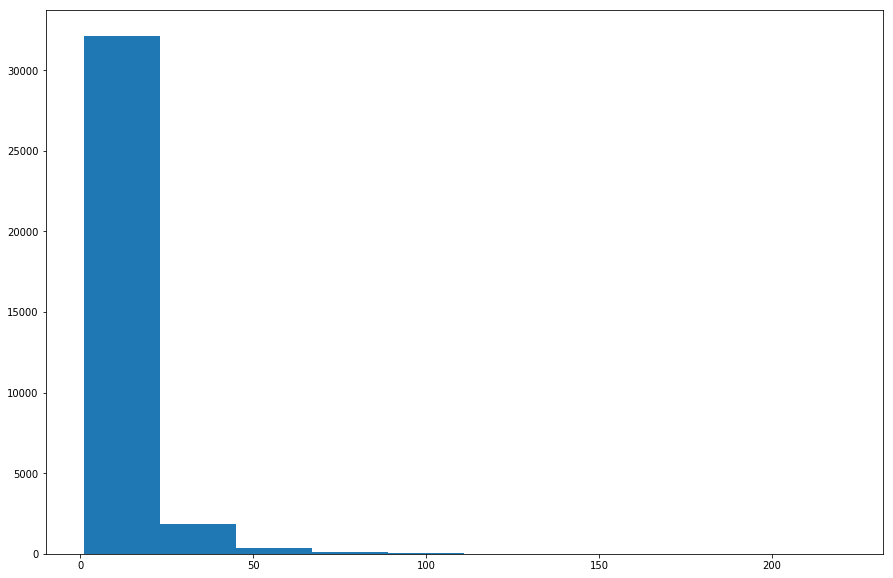

In [166]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 10]
plt.hist([len(str(entry)) for entry in no])

{'견',
 '금속섬유',
 '금속성섬유(지정외)',
 '기모',
 '기타섬유',
 '깃털',
 '나일론',
 '낙타',
 '너구리(지정외)',
 '네오프렌',
 '데님',
 '레이온',
 '리오셀',
 '마',
 '면',
 '모',
 '모달',
 '모헤어',
 '모혼방',
 '벨벳',
 '새틴',
 '샴브레이',
 '셀룰로오스 섬유(지정외)',
 '솜털',
 '스웨이드',
 '스판덱스',
 '시어서커',
 '실크',
 '아세테이트',
 '아크릴',
 '알파카',
 '앙고라',
 '야크(지정외)',
 '양털',
 '옥스포드',
 '인조퍼',
 '저지',
 '쭈리',
 '천연가죽(돼지)',
 '천연가죽(사슴)',
 '천연가죽(소)',
 '천연가죽(양)',
 '천연가죽(염소)',
 '천연고무',
 '천연모피',
 '천연모피(너구리)',
 '천연모피(밍크)',
 '천연모피(소)',
 '천연모피(양)',
 '천연모피(여우)',
 '천연모피(염소)',
 '천연모피(족제비)',
 '천연모피(토끼)',
 '카멜',
 '캐시미어',
 '코듀로이',
 '코팅가죽',
 '큐프라',
 '테리',
 '토끼(지정외)',
 '트리아세테이트',
 '트위드',
 '폴리메틸메타크릴레이트',
 '폴리에스터',
 '폴리염화비닐',
 '폴리우레탄',
 '플란넬',
 '플리스',
 '합성가죽',
 '합성고무',
 '후리스'}